$f(x) = 4x^2+x+1$

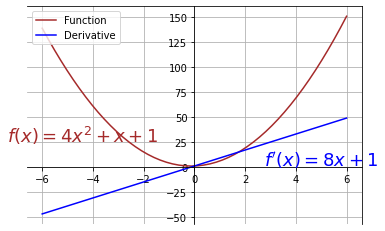

In [2]:
# importing modules
import matplotlib.pyplot as plt
from scipy.misc import derivative
import numpy as np
  
# method to return function
def function(x):
    return 4*x**2+x+1
  
# method to return its derivative
def deriv(x):
    return derivative(function, x)
  
#range in x-axis array from -6 to 6
x = np.linspace(-6, 6)
#print(x)
  
# plotting function
y = function(x)
#print(y)
plt.plot(x, y, color='brown', label='Function')


# plotting its derivative
d = deriv(x)
#print(d)
plt.plot(x, d, color='blue', label='Derivative')
  
# changing limits of y-axis
plt.gca().spines['left'].set_position('zero',)
  
# changing limits of x-axis
plt.gca().spines['bottom'].set_position('zero',)
plt.legend(loc='upper left')
  
# plotting text in the graph
plt.text(5.0, 1.0, r"$f'(x)=8x+1$", horizontalalignment='center',
         fontsize=18, color='blue')
  
plt.text(-4.4, 25.0, r'$f(x)=4x^2+x+1$', horizontalalignment='center',
         fontsize=18, color='brown')
plt.grid(True)

In [3]:
print (x)

[-6.         -5.75510204 -5.51020408 -5.26530612 -5.02040816 -4.7755102
 -4.53061224 -4.28571429 -4.04081633 -3.79591837 -3.55102041 -3.30612245
 -3.06122449 -2.81632653 -2.57142857 -2.32653061 -2.08163265 -1.83673469
 -1.59183673 -1.34693878 -1.10204082 -0.85714286 -0.6122449  -0.36734694
 -0.12244898  0.12244898  0.36734694  0.6122449   0.85714286  1.10204082
  1.34693878  1.59183673  1.83673469  2.08163265  2.32653061  2.57142857
  2.81632653  3.06122449  3.30612245  3.55102041  3.79591837  4.04081633
  4.28571429  4.53061224  4.7755102   5.02040816  5.26530612  5.51020408
  5.75510204  6.        ]
